In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
full_df = pd.read_csv('twitter_candidates_profile.csv')

full_df['is_retweet'] = (full_df['username'] != full_df['user_rt']) & (full_df.user_rt != 'None')
full_df = full_df[['date', 'time', 'username', 'tweet', 'replies', 'retweets', 'likes', 'is_retweet', 'user_rt']]

full_df['datetime'] = pd.to_datetime(full_df.date.str.cat(full_df.time, sep=' '))
full_df.drop(['date', 'time'], inplace=True, axis=1)
full_df.set_index('datetime', inplace=True)

twitter_df = full_df[~full_df.is_retweet]
twitter_df = twitter_df.drop(['is_retweet', 'user_rt'], axis=1)
twitter_df.head()

username  \
datetime                         
2018-10-16 09:05:26  RozeckaPL   
2018-10-14 09:56:36  RozeckaPL   
2018-10-12 19:49:14  RozeckaPL   
2018-10-09 11:53:44  RozeckaPL   
2018-10-08 09:45:44  RozeckaPL   

                                                                 tweet  \
datetime                                                                 
2018-10-16 09:05:26  Uczyńmy Wrocław miastem wrażliwym 💗 na problem...   
2018-10-14 09:56:36  Bezpieczeństwo wrocławian jest najważniejsze -...   
2018-10-12 19:49:14  Szermierka uczy wytrwałości i dyscypliny, a ta...   
2018-10-09 11:53:44  Zmiany Urzędzie Miejskim Wrocławia? Ależ tak -...   
2018-10-08 09:45:44  Na #Wrocław.skim rynku odbywa się dzisiaj cykl...   

                     replies  retweets  likes  
datetime                                       
2018-10-16 09:05:26        3        10     16  
2018-10-14 09:56:36        8        42     95  
2018-10-12 19:49:14        1        15     43  
2018-10-09 11:53:44        6        34     64  
2018-10-08 09:45:44        3        11     43

In [6]:
FROM_DATE = '2018-07-15'

In [4]:
candidates = twitter_df.username.unique()
candidates

array(['RozeckaPL', 'GoTracz', 'martalempart', 'MichalakJerzy',
       'KatarzynaObara', 'SutrykJacek'], dtype=object)

### Tweets and retweets in time

#### Tweets in time

In [5]:
date_tweets = twitter_df.groupby([twitter_df.index.date, twitter_df.username])['tweet'].count().reset_index()
date_tweets.columns = ['date', *date_tweets.columns[1:]]
date_tweets.date = pd.to_datetime(date_tweets.date)
date_tweets[date_tweets.date > FROM_DATE].head()

date       username  tweet
649 2018-07-16  MichalakJerzy      1
650 2018-07-16    SutrykJacek      1
651 2018-07-18        GoTracz      1
652 2018-07-18  MichalakJerzy      1
653 2018-07-19        GoTracz      2

Text(0.5,1,'Liczba tweetów (agregacja dzienna)')

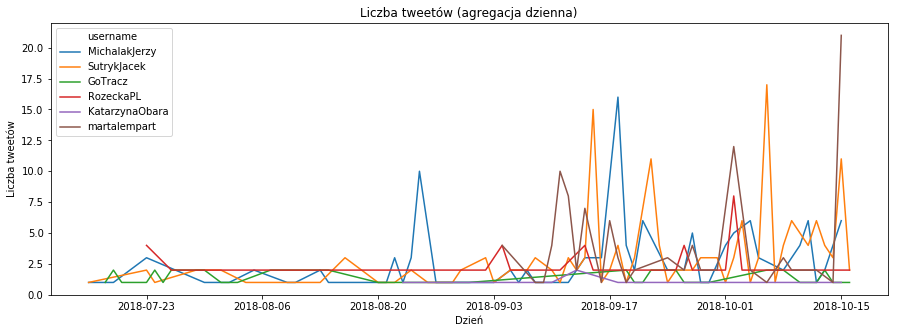

In [6]:
_, ax = plt.subplots(figsize=(15, 5))

ax = sns.lineplot(data=date_tweets[date_tweets.date > FROM_DATE], hue='username', y='tweet', x='date', ax=ax)

ax.set_xlabel('Dzień')
ax.set_ylabel('Liczba tweetów')
ax.set_title('Liczba tweetów (agregacja dzienna)')

In [7]:
week_tweets = twitter_df.reset_index()
week_tweets = week_tweets.groupby([pd.Grouper(key='datetime', freq='W-MON'), week_tweets.username])['tweet'].count().reset_index()
week_tweets.head()

datetime        username  tweet
0 2013-11-25       RozeckaPL      2
1 2014-02-17       RozeckaPL      2
2 2014-03-17       RozeckaPL      2
3 2014-07-28  KatarzynaObara      1
4 2014-09-01       RozeckaPL      2

In [8]:
_, ax = plt.subplots(figsize=(15, 5))

ax = sns.lineplot(data=week_tweets[week_tweets.datetime > FROM_DATE], hue='username', y='tweet', x='datetime', ax=ax)

ax.set_xlabel('Tydzień')
ax.set_ylabel('Liczba tweetów')
ax.set_title('Liczba tweetów (agregacja tygodniowa)')

Text(0.5,1,'Liczba tweetów (agregacja tygodniowa)')

#### Retweets in time
Retweeting other users tweets.

In [9]:
retweets = full_df[full_df.is_retweet & full_df.user_rt.isin(candidates)].reset_index()
retweets_week = retweets.groupby([pd.Grouper(key='datetime', freq='W'), retweets.user_rt])['tweet'].count().reset_index()
retweets_week.head()


datetime    user_rt  tweet
0 2014-10-12  RozeckaPL      6
1 2014-10-19  RozeckaPL      4
2 2014-11-09  RozeckaPL      4
3 2014-11-16  RozeckaPL      4
4 2014-11-30  RozeckaPL     10

Text(0.5,1,'Liczba retweetów (agregacja tygodniowa)')

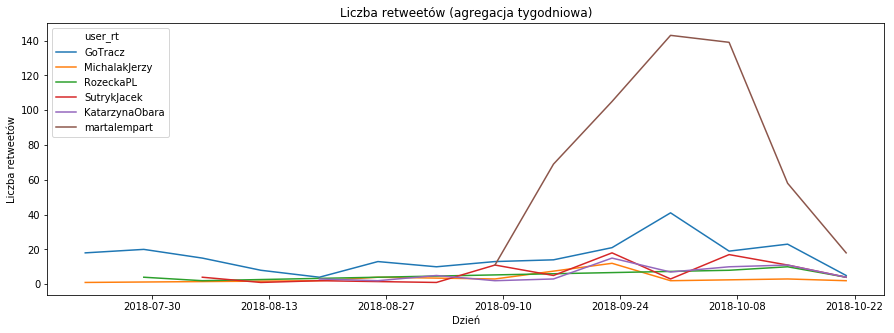

In [49]:
_, ax = plt.subplots(figsize=(15, 5))
ax = sns.lineplot(data=retweets_week[retweets_week.datetime > FROM_DATE], hue='user_rt', y='tweet', x='datetime', ax=ax)
ax.set_xlabel('Dzień')
ax.set_ylabel('Liczba retweetów')
ax.set_title('Liczba retweetów (agregacja tygodniowa)')

### Retweets
Retweets received for personal tweets.

In [11]:
retweets_date = twitter_df.reset_index()
retweets_date = retweets_date.groupby([pd.Grouper(key='datetime', freq='D'), retweets_date.username])['retweets'].sum().reset_index()
retweets_date.tail()

datetime      username  retweets
860 2018-10-15   SutrykJacek       168
861 2018-10-15  martalempart        31
862 2018-10-16       GoTracz         5
863 2018-10-16     RozeckaPL        20
864 2018-10-16   SutrykJacek         8

Text(0.5,1,'Liczba retweetów (agregacja dzienna)')

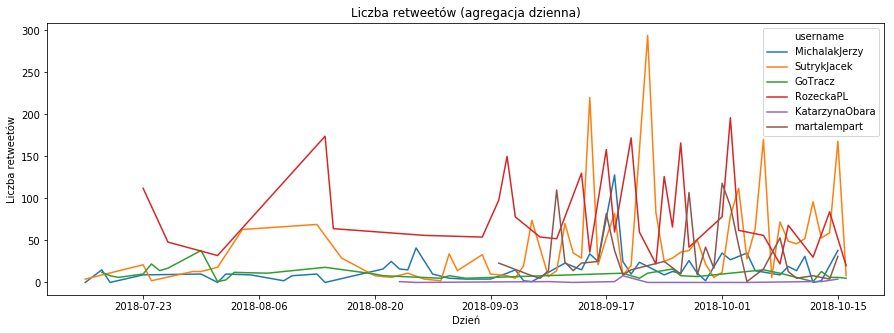

In [12]:
_, ax = plt.subplots(figsize=(15, 5))

ax = sns.lineplot(data=retweets_date[retweets_date.datetime > FROM_DATE], hue='username', y='retweets', x='datetime', ax=ax)

ax.set_xlabel('Dzień')
ax.set_ylabel('Liczba retweetów')
ax.set_title('Liczba retweetów (agregacja dzienna)')

### Likes

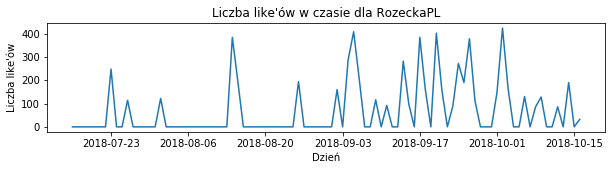

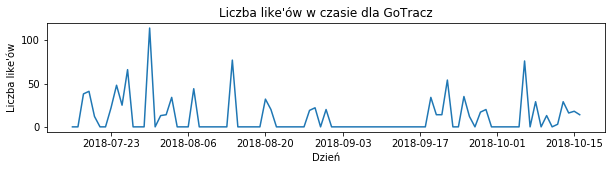

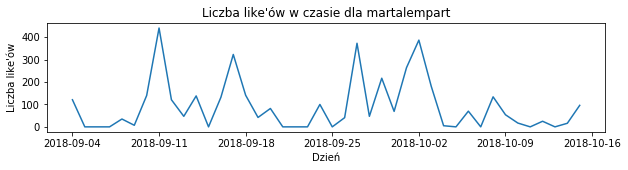

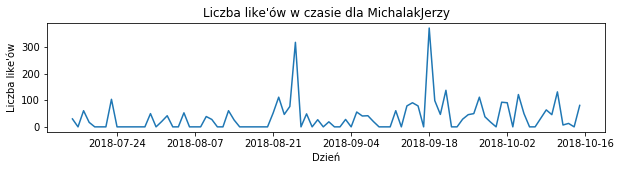

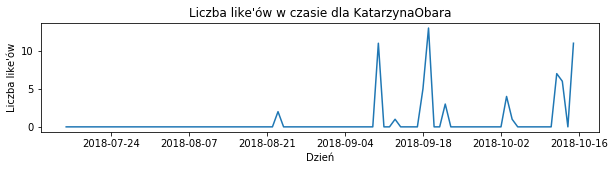

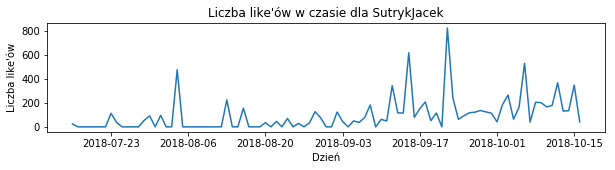

In [8]:
for candidate in candidates:
    df = twitter_df[twitter_df.username == candidate]
    
    _, ax = plt.subplots(figsize=(10, 2))
    ax.set_title(f'Liczba like\'ów w czasie dla {candidate}')
    
    df = df.reset_index()
    df = df.groupby(pd.Grouper(key='datetime', freq='D'))['likes'].sum().reset_index()
    ax = sns.lineplot(x='datetime', y='likes', data=df[df.datetime > FROM_DATE], ax=ax)
    
    ax.set_xlabel('Dzień')
    ax.set_ylabel('Liczba like\'ów')

### Activity distribution per hour

In [14]:
df = full_df.reset_index()
hour_tweets = df.groupby([pd.Grouper(key='datetime', freq='H'), df.user_rt])['tweet'].count().reset_index()
hour_tweets.tail()

datetime       user_rt  tweet
2497 2018-10-16 08:00:00       GoTracz      1
2498 2018-10-16 08:00:00   SutrykJacek      1
2499 2018-10-16 08:00:00  martalempart      1
2500 2018-10-16 09:00:00     RozeckaPL      2
2501 2018-10-16 09:00:00  martalempart      1

In [15]:
hour_tweets['hour'] = hour_tweets.datetime.apply(lambda ts: ts.hour)
hour_tweets.tail()

datetime       user_rt  tweet  hour
2497 2018-10-16 08:00:00       GoTracz      1     8
2498 2018-10-16 08:00:00   SutrykJacek      1     8
2499 2018-10-16 08:00:00  martalempart      1     8
2500 2018-10-16 09:00:00     RozeckaPL      2     9
2501 2018-10-16 09:00:00  martalempart      1     9

In [16]:
hour_tweets = hour_tweets.groupby([hour_tweets.hour, hour_tweets.user_rt])['tweet'].sum().reset_index()
hour_tweets.tail()

hour         user_rt  tweet
139    23         GoTracz      2
140    23  KatarzynaObara      1
141    23   MichalakJerzy      1
142    23            None      1
143    23    martalempart      2

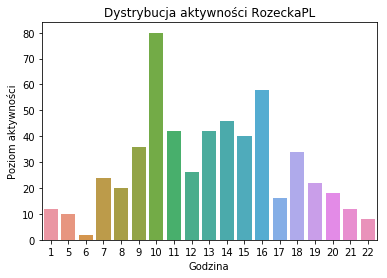

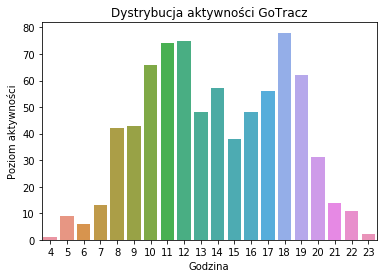

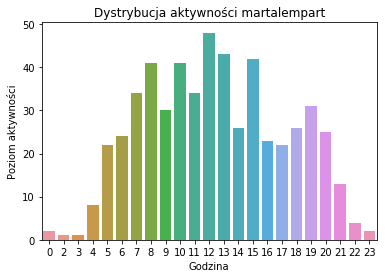

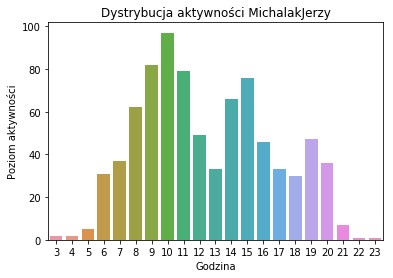

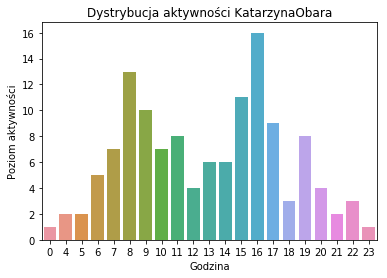

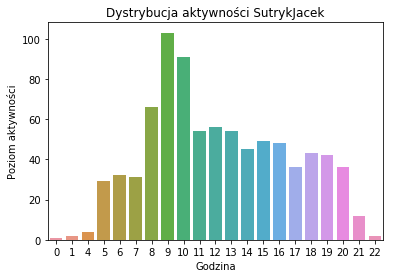

In [17]:
for candidate in candidates:
    df = hour_tweets[hour_tweets.user_rt == candidate]
    
    _, ax = plt.subplots()
    ax.set_title(f'Dystrybucja aktywności {candidate}')
    ax = sns.barplot(x=df.hour, y=df.tweet, ax=ax)
    
    ax.set_xlabel('Godzina')
    ax.set_ylabel('Poziom aktywności')

In [18]:
weekday_tweets = full_df.groupby([full_df.index.dayofweek, full_df.user_rt])['tweet'].count().reset_index()
weekday_tweets.tail()

datetime        user_rt  tweet
44         6  MichalakJerzy     26
45         6           None      5
46         6      RozeckaPL     40
47         6    SutrykJacek     97
48         6   martalempart     47

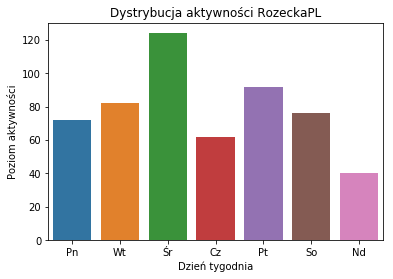

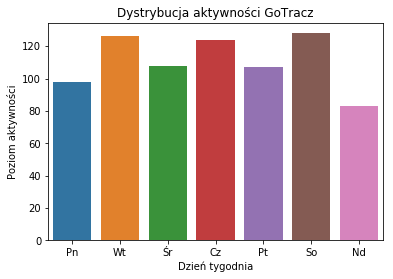

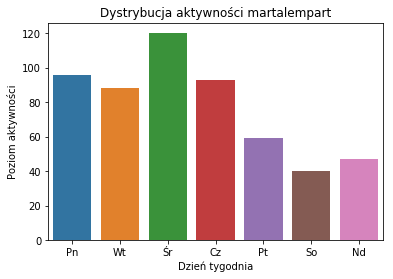

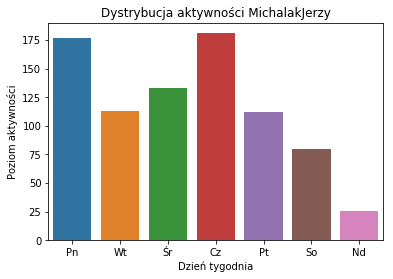

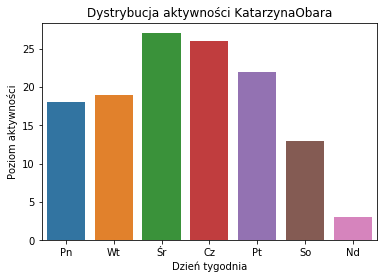

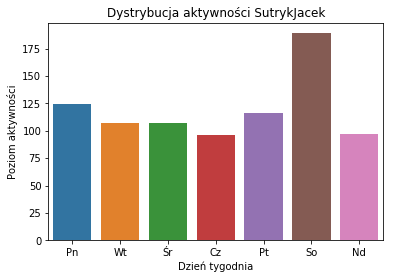

In [19]:
for candidate in candidates:
    df = weekday_tweets[weekday_tweets.user_rt == candidate]
    
    _, ax = plt.subplots()
    ax.set_title(f'Dystrybucja aktywności {candidate}')
    ax = sns.barplot(x=df.datetime, y=df.tweet)
    
    ax.set_xticklabels(['Pn', 'Wt', 'Śr', 'Cz', 'Pt', 'So', 'Nd'])
    
    ax.set_xlabel('Dzień tygodnia')
    ax.set_ylabel('Poziom aktywności')

In [20]:
weekday_tweets = full_df.reset_index()
weekday_tweets['day_of_week'] = weekday_tweets.datetime.map(lambda x: x.dayofweek)
weekday_tweets = weekday_tweets[['day_of_week', 'user_rt']]
weekday_tweets.tail()

day_of_week      user_rt
3771            0  SutrykJacek
3772            6  SutrykJacek
3773            6  SutrykJacek
3774            6  SutrykJacek
3775            6  SutrykJacek

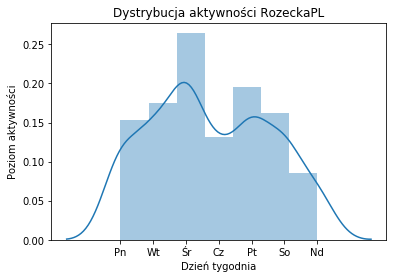

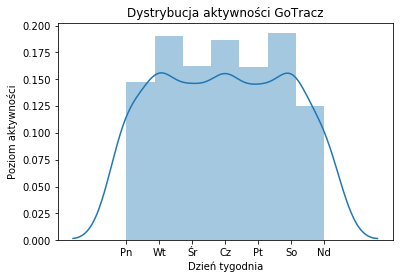

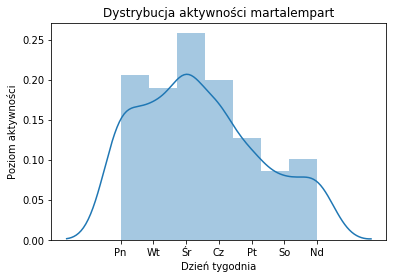

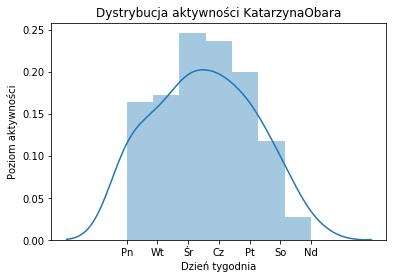

In [21]:
for candidate in candidates:
    df = weekday_tweets[weekday_tweets.user_rt == candidate]   
    
    _, ax = plt.subplots()
    ax.set_title(f'Dystrybucja aktywności {candidate}')
    ax = sns.distplot(df.day_of_week, bins=7)
    
    ax.set_xticks(range(7))
    ax.set_xticklabels(['Pn', 'Wt', 'Śr', 'Cz', 'Pt', 'So', 'Nd'])
    
    ax.set_xlabel('Dzień tygodnia')
    ax.set_ylabel('Poziom aktywności')

### Sentiment

In [22]:
! polyglot download sentiment2.pl

[polyglot_data] Downloading package sentiment2.pl to
[polyglot_data]     /home/jovyan/polyglot_data...
[polyglot_data]   Package sentiment2.pl is already up-to-date!


In [23]:
from polyglot.text import Text

text = Text(twitter_df.tweet[3])
for w in text.words:
    print("{:<16}{:>2}".format(w, w.polarity))

Zmiany           0
Urzędzie         0
Miejskim         0
Wrocławia        0
?                0
Ależ             0
tak              0
-                0
po               0
prostu           0
rozsądnie        1
i                0
gospodarnie      0
!                0
pic.twitter.com  0
/                0
xObfWu5FuU       0


In [24]:
def tweet_to_mean_sentiment(tweet):
    text = Text(tweet, hint_language_code='pl')
    return np.mean([w.polarity for w in text.words])

tweet_to_mean_sentiment(twitter_df.tweet[3])

0.058823529411764705

In [25]:
twitter_df['sentiment'] = twitter_df.tweet.map(tweet_to_mean_sentiment)
twitter_df.sample(10, random_state=1)

username  \
datetime                             
2017-09-19 15:54:32    SutrykJacek   
2018-05-30 08:34:34      RozeckaPL   
2018-09-13 07:37:32   martalempart   
2018-10-08 08:45:51   martalempart   
2018-01-22 09:17:57    SutrykJacek   
2018-08-07 11:18:09        GoTracz   
2018-09-26 12:56:39  MichalakJerzy   
2018-09-12 11:31:27   martalempart   
2016-03-26 09:14:03      RozeckaPL   
2018-01-18 09:54:12  MichalakJerzy   

                                                                 tweet  \
datetime                                                                 
2017-09-19 15:54:32  W Barbarze konsultujemy strategie współpracy m...   
2018-05-30 08:34:34  W Dzień Dziecka 👶🧒👧 poczytam bajki dzieciom😊Sp...   
2018-09-13 07:37:32  Brawo. Brawo. Brawo. Niech to będzie, wreszcie...   
2018-10-08 08:45:51  Dziś w nocy zmarł Piotr Pawłowski. Okropna wia...   
2018-01-22 09:17:57  Prezentujemy wyniki Wrocławskiej Diagnozy Społ...   
2018-08-07 11:18:09  Nowe priorytety w walce z upałem we Wrocławiu ...   
2018-09-26 12:56:39  Modernizacja dróg musi w kolejnej kadencji uzy...   
2018-09-12 11:31:27  Good. Our European community is joined by and ...   
2016-03-26 09:14:03                         pic.twitter.com/zA3tWj2UvC   
2018-01-18 09:54:12  Zdecydowana większość wrocławian, z którymi si...   

                     replies  retweets  likes  sentiment  
datetime                                                  
2017-09-19 15:54:32        0         0     12   0.000000  
2018-05-30 08:34:34        5         7     16   0.000000  
2018-09-13 07:37:32        0        11     38   0.000000  
2018-10-08 08:45:51       19        43    111  -0.043478  
2018-01-22 09:17:57        1         1     17   0.000000  
2018-08-07 11:18:09        2         8     30   0.000000  
2018-09-26 12:56:39        1         7     27   0.044444  
2018-09-12 11:31:27        0         1     10   0.000000  
2016-03-26 09:14:03        0         0      3   0.000000  
2018-01-18 09:54:12        1         0     10   0.000000

In [50]:
df = twitter_df.reset_index()
df = df[df.datetime > '2018-07']
sent_in_time = df.groupby([pd.Grouper(key='datetime', freq='D'), df.username])['sentiment'].mean().reset_index()
sent_in_time.tail()

datetime      username  sentiment
239 2018-10-15   SutrykJacek   0.014820
240 2018-10-15  martalempart  -0.001187
241 2018-10-16       GoTracz   0.017857
242 2018-10-16     RozeckaPL   0.000000
243 2018-10-16   SutrykJacek   0.043478

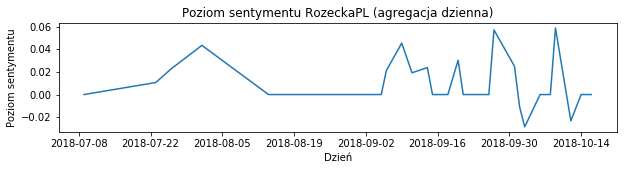

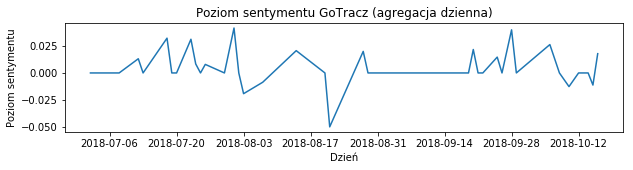

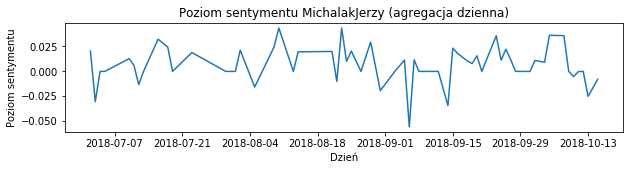

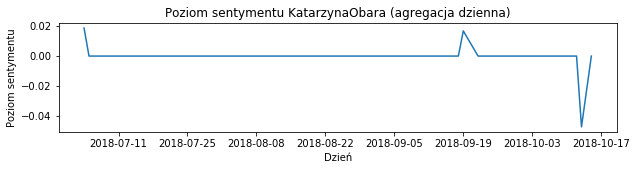

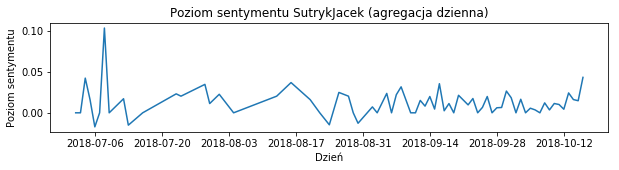

In [56]:
for c in candidates:
    _, ax = plt.subplots(figsize=(10, 2))
    ax = sns.lineplot(data=sent_in_time[sent_in_time.username == c], y='sentiment', x='datetime', ax=ax)
    ax.set_xlabel('Dzień')
    ax.set_ylabel('Poziom sentymentu')
    ax.set_title(f'Poziom sentymentu {c} (agregacja dzienna)')